<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 2: Logistic Regression example

In this notebook we will try to classify the instances of the Iris flower dataset by using the Logistic Regression algorithm. The dataset and libraries used were described in the first notebook (`1- Naibe Bayes`). Please refer to it in case of any doubt.

Let's import the classes we need:

In [1]:
# Import packages
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [2]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [3]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [4]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100, 4)
xtest shape:  (50, 4)
ytest shape:  (50, 4)


Great, data seems correct.

We will now create the classifier. In this notebook, we will use the `LogisticRegression` implementation available in `scikit-learn`. An important matter to have in mind is that this algorithm performs 100 iterations by default, which sometimes are not enough for the algorithm convergence. Thus, we'll increment the number of iterations to 1000.

Some of the most useful parameters are the following:

```
penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

...

class_weight: dict or ‘balanced’, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

...

solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not support setting penalty='none'
Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

multi_class: {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.
```
`penalty` allows to add a regularization term. `class_weight` is very useful when dealing with unbalanced datasets. `solver` specifies the solver to use. Finally, `multi_class` allows to choose the multi-class strategy.

We'll also specify a random seed (`random_state`) so that we can repeat the experiment and still get the same results.

For more information about `LogisticRegression`, please refer to the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">documentation</a>.

In [5]:
# Init the Classifier
model = LogisticRegression(max_iter=1000, random_state=42)

We can now train the model:

In [6]:
# Train the model 
model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


And once trained, predict the labels for the test set:

In [7]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives.

Text(110.44999999999997, 0.5, 'Predicted')

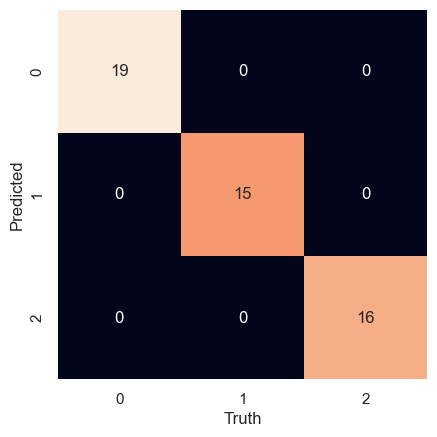

In [8]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

As you can see, the model behaves perfectly.

We can also compute the most common classification metrics with the help of `sklearn.metrics.classification_report`. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical slides or access the <a hred="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">documentation</a>.

In [9]:
from sklearn.metrics import classification_report

print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In this case we can also obtain some probability estimates with `predict_proba`.

```
Probability estimates.

The returned estimates for all classes are ordered by the label of classes.

For a multi_class problem, if multi_class is set to be “multinomial” the softmax function is used to find the predicted probability of each class. Else use a one-vs-rest approach, i.e calculate the probability of each class assuming it to be positive using the logistic function. and normalize these values across all the classes.
```


In [10]:
preds_proba = model.predict_proba(xtest)
print(preds_proba[0, :])

[0.00430387 0.82457927 0.17111686]


According to these probabilities, the winning class is 1, with $p(X=0)=0.00$, $p(X=1)=0.83$ and $p(X=2)=0.17$.

Finally, we can also graphically show the decision boundaries for the 3 classes. However, since we will visualize them in 2 dimensions, we'll need to re-train the algorithm with just 2 of the 4 available variables. For this example, we'll take the first 2, but feel free to try with any other combination!

(3.29, 8.890000000000004, 0.99, 5.390000000000004)

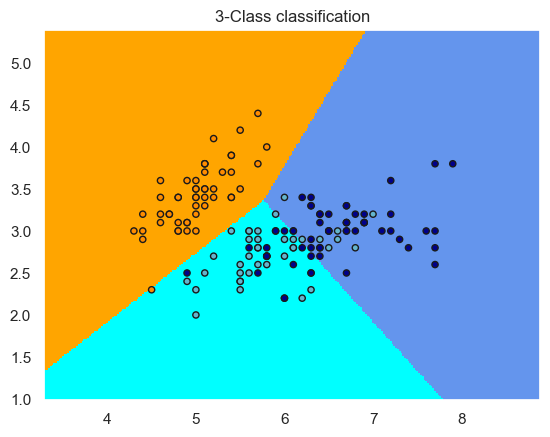

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris.data[:, :2]
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Train the model 
model.fit(xtrain[:, :2], ytrain) # to visualize in 2-dim, we can only take 2 variables
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')